# Projeto de conclusão de Engenharia de Machine Learning

## Projeto de análise de dados sobre transporte público da cidade de São Paulo.

## Bibliotecas necessárias
Este projeto é escrito em [Python 3.6.5](https://www.python.org/) e as bibliotecas padrões utilizadas estão incluidas no [Anaconda 5.2](https://www.anaconda.com/download/#linux), toda via, bibliotecas adicionais foram necessárias:

#### [GeoPandas 0.4.0](http://geopandas.org/)

GeoPandas é um projeto de código aberto para facilitar o trabalho com dados geoespaciais em Python, o GeoPandas interpreta os  dados usados pelos pandas para permitir operações espaciais em tipos geométricos, o geopandas dependem ainda da biblioteca fiona para acesso a arquivos e matplotlib para plotagem.

#### [Simpledbf 0.12](https://pypi.org/project/simpledf/)

O simpledbf é uma biblioteca Python para converter arquivos DBF para arquivos CSV, quadros de dados do Pandas, tabelas SQL ou tabelas HDF5. Este pacote é totalmente compatível com Python> = 3.4, com suporte quase completo a Python 2.7 também. A conversão para CSV e SQL é inteiramente escrita em Python, portanto, nenhuma dependência adicional é necessária. 

## Sumário

[Resumo](#Resumo)

[Introdução](#Introdução)

1. [Descrição do problema](#1.0-Descrição-do-problema)

2. [Conjunto de dados](#2.0-Conjunto-de-dados)

3. [Contextualização](#3.0-Contextualização)

4. [Explorando os Dados](#4.0-Explorando-os-Dados)

[Referências](#Referências)

## Resumo

[[Voltar ao indice]](#Sumário)

Utilizar os dados de linhas, suprefeituras e estações para desenvolver um sistemas que pode relacionar por cluster s os dados, e encontrar os locais onde possue maior quantidade de linha e relacionalos com a população do distrito, e conseguir descobrir quais as vias com maior densidade de onibus



O transporte coletivo de pessoas é algo muito importante em uma cidade, pois permite o deslocamento em massa de determinado local para outro. Existem vários meios de transporte atualmente, dentre eles podemos destacar o modal rodoviário de ônibus coletivos, que possui um valor relativamente baixo de implantação comparando com outros modais, bem como o seu dinamismo e facilidade de aplicação e operação o tornam um sistema muito eficiente e de rápido impacto. Entretanto por possuir uma caracteristica de fácil aplicação o modal rodoviário sofre com o planejamento desproporcional e que visa aspectos imediatistas, em decorrência a estrutura operacional e a distribuição de linhas e rotas acaba por muitas vezes atuando de forma ineficiente, causando transtorno para os usuários, como também a elevação dos custos operacionais. O objetivo deste projeto é desenvolver um sistema capaz de analizar informações sobre a malha rodoviária de ônibus coletivos da cidade de São Paulo, comparando-os com os dados de população de cada área da cidade, permitindo assim o agrupamento dos atributos pertencentes as dados, para poder desenvolver um planejamento mais preciso levando em consideração expectativas futuras.

## 1.0 Descrição do problema

[[Voltar ao indice]](#Sumário)

A falta de utilização de big data e análise de dados no planejamento de transporte causa um desiquilíbrio muito grande na segmentação do transporte, com este problema em enfoque, pode-se desenvolver um sistema capaz de analisar dados oficiais de linhas, bem como demografia dos bairros e cidade para criar modelo adaptativos e de comparação histórica, com isso permitir o planejamento eficaz e equilibrado do transporte coletivo.

## 2.0 Conjunto de dados

[[Voltar ao indice]](#Sumário)

#### Serão utilizados dados oficiais da população da cidade de São Paulo obtidos através do site http://infocidade.prefeitura.sp.gov.br/, sendo ele:

    População Censitária e Projeções Populacionais: Município de São Paulo, Subprefeituras e Distritos Municipais 2008, 2009, 2010, 2011 a 2020, 2025, 2030 e 2040 

#### Os dados utilizados sobre o transporte coletivo da cidade será do CEM(Centro de Estudos da Metrópole) obtidos através do site http://web.fflch.usp.br/centrodametropole/716, sendo eles:

    Banco de dados de Linhas de ônibus do Município de São Paulo.   
    

## 3.0 Contextualização

[[Voltar ao indice]](#Sumário)

 Segundo o relatório de estimativas de população de 2017 (ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2017/estimativa_dou_2017.pdf) o municipio de São Paulo pussui a maior população do Brasil com 12.106.920 pessoas vivendo na cidade no ano referente, com isso torna o municipio, um ótimo objeto de estudo sobre o transporte de seus residentes diariamente.
 

## 4.0 Explorando os Dados

[[Voltar ao indice]](#Sumário)

Nesta seção analizaremos os dados mencionados, para para melhor visualização e separação o objeto de estudo deste projeto será reduzido a uma determinada área, pois o processamento de todas as linhas do municipio aumentará significamente a necessidade de processamento mais robusto.

### 4.0.1 Dataset da prefeitura municipal de São Paulo

Pimeiramente exploraremos os dados censitários e projeções populacionais disponiveis em [População Censitária e Projeções Populacionais ](http://infocidade.prefeitura.sp.gov.br/tabelas/7_populacao_censitaria_e_projecoes_populac_2008_10573.xls) que determinam a porjeção populacional de cada bairro do municipio em determindado periodo de tempo.

In [7]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Carregando o dataset de população censitária
data_densidade = pd.read_excel('./datasets/7_populacao_censitaria_e_projecoes_populac_2008_10489.xls', header=3)
display(data_densidade.head(3))

,Distritos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2025,2030,2040
0,Aricanduva,90741.897265,90186.844150,89622.0,88797.675201,87970.666185,87141.035987,86308.846365,85474.157858,84637.029861,83797.520701,82955.687724,82111.587385,81265.275354,77002.447655,72692.442786,63959.265183
1,Carrão,82329.010493,82809.728415,83281.0,83507.604471,83725.054800,83933.127942,84131.596654,84320.229468,84498.790667,84667.040279,84824.734076,84971.623589,85107.456138,85611.632359,85799.184534,85080.231101
2,Vila Formosa,94717.981184,94765.452647,94799.0,94552.495187,94295.627046,94028.317353,93750.486690,93462.054480,93162.939042,92853.057638,92532.326553,92200.661168,91857.976060,89976.223161,87805.932711,82558.310911


Com o dataset importado podemos iniciar as análises no mesmo, primeiramente devemo descobrir os baiiro com maiores populações em 2040, pois trabalharemos a partir destes dados.

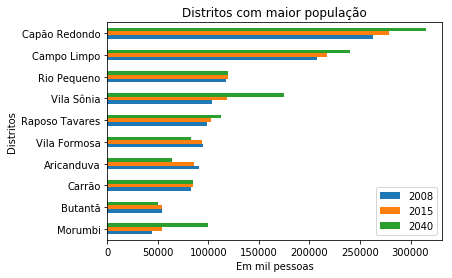

In [9]:
# Selecionar periodo de tempo para comparação de população
top = data_densidade[['Distritos', 2008,2015,2040]].head(10).set_index('Distritos').sort_values(2008,ascending=True)
top.plot(kind='barh')

# Plotagem dos dados
plt.title('Distritos com maior população')
plt.xlabel('Em mil pessoas')
plt.show()

Como podemos ver o distrito com maior projeção populacional em 2040 é Capão Redondo, entretando por necessidade de planejamento as linhas de ônibus da cidade são distribuidas em áreas, como podemos ver na imagem abaixo: 

#### Composição de áreas do sistema de transporte


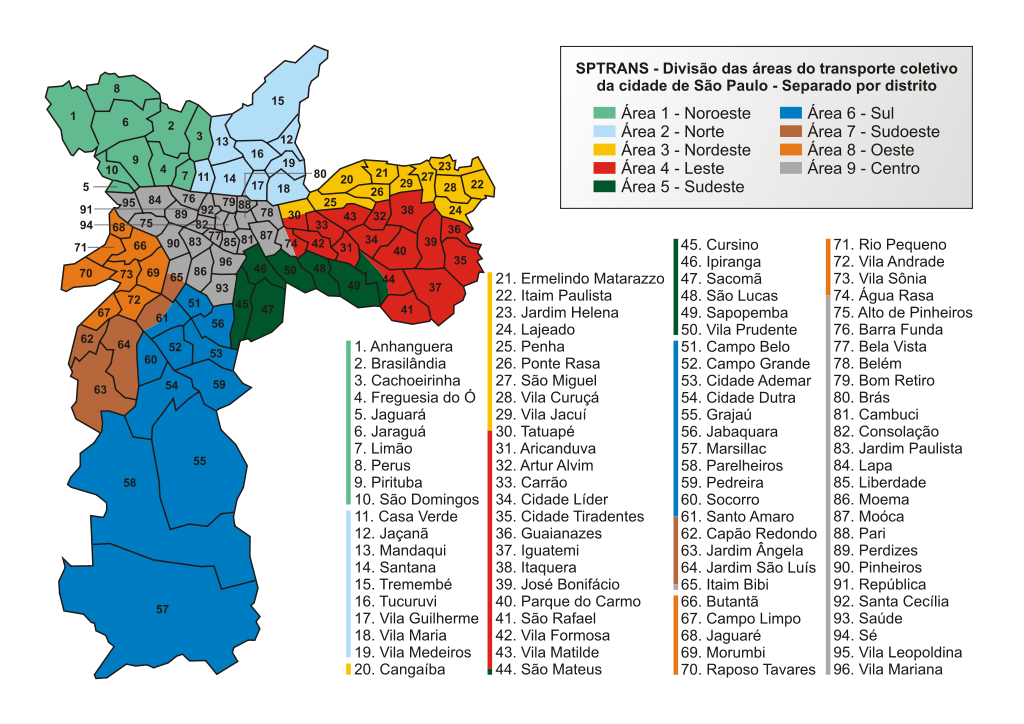

[Fonte](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Areas_da_sp_trans.svg/1024px-Areas_da_sp_trans.svg.png)



### 4.0.3  Shapes das linhas dp Dataset do CEM(Centro de Estudos da Metrópole) 

Para analizar os distritos do municipio, utilizaremos os shapes dos mapas encontrados em [BANCO DE DADOS DE LINHAS DE ÔNIBUS - MUNICÍPIO DE SÃO PAULO](http://web.fflch.usp.br/centrodametropole/upload/arquivos/LB15_MSP_CEM_V3.zip)

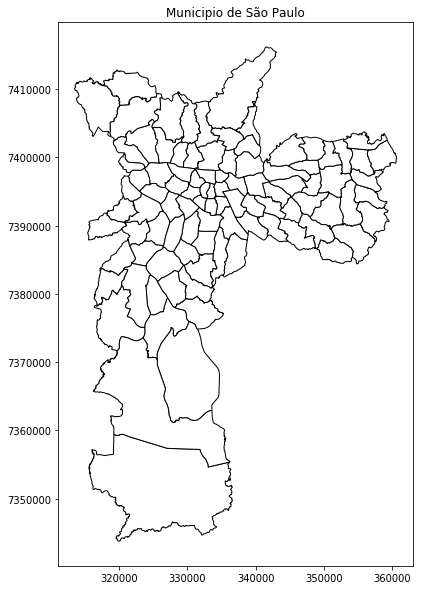

In [11]:
# Importando bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregando shape demográfico do municipio 
gdf = gpd.read_file('./shapes/SAD69-96_SHP_distrito/SAD69-96_SHP_distrito_polygon.shp')
gdf.plot(color='w', edgecolor='k',figsize=(10,10))
plt.title('Municipio de São Paulo')
plt.show()


Como já mencionado, selecionaremos somente uma área de operação neste projeto, que será a área 7, pois o bairro de Capão Redondo esta relacionado no mesmo.

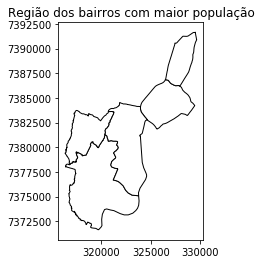

,ds_codigo,ds_nome,geometry
8,71,SANTO AMARO,"POLYGON ((325612.9394202752 7381836.282049486,..."
16,43,JARDIM ANGELA,"POLYGON ((319693.3711568928 7371627.938813834,..."
25,19,CAPAO REDONDO,"POLYGON ((316708.4792031111 7378249.644910477,..."
60,35,ITAIM BIBI,"POLYGON ((327937.5162588641 7386185.235967156,..."
95,46,JARDIM SAO LUIS,"POLYGON ((321673.0860525215 7377826.369338656,..."


In [12]:
# Selecionando locais da área 7
distritos = gdf[gdf['ds_nome'].isin(['CAPAO REDONDO','JARDIM ANGELA','JARDIM SAO LUIS', 'SANTO AMARO', 'ITAIM BIBI'])].copy()
distritos.plot(color='w', edgecolor='k')
plt.title('Região dos bairros com maior população')
plt.show()
distritos.head()

Em seguida carregaremos o shapefile das linhas de ônibus que pertencem a área 7

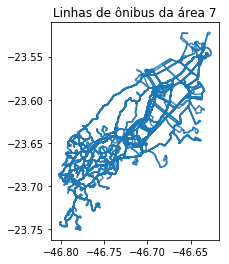

In [13]:
gd = gpd.read_file('./LB15_MSP_CEM_V3/LB15_LI_MSP_CEM_V3.shp')
mais=gd.loc[gd['COD_AREA'] == 'AREA 7'].plot()
plt.title('Linhas de ônibus da área 7')
plt.show()

O dataset possui dados onde a data de criação esta em zero, ao consultar no  site da SPTrans foi constatado que tais linhas foram alteradas, por isso devemo remove-las de nossa analise.

In [14]:
# Remover dados com 'DATA_CRIA' = a 0
gd.drop(gd[gd.DATA_CRIA == 0].index ,inplace=True)

# Remover dados que sejam diferentes das áre 7
gd.drop(gd[gd.COD_AREA != 'AREA 7'].index ,inplace=True)

Podemo extrair algumas relações dos dados

In [15]:
# Quantidades de linhas criadas antes de 2008
oni =gd.loc[gd['DATA_CRIA'] < 2008]
antes= oni['FROTA'].sum()

# Quantidades de linhas criadas depois  de 2008
oni_d=gd.loc[gd['DATA_CRIA'] <= 2015]
depois= oni_d['FROTA'].sum()

# abertura temporaria do aruivo censitario
data_densidade = pd.read_excel('./datasets/data.xls', header=4)


#'CAPAO REDONDO','JARDIM ANGELA','JARDIM SAO LUIS', 'SANTO AMARO', 'ITAIM BIBI'
area=data_densidade[data_densidade['Distritos'].isin(['Capão Redondo','Jardim Ângela', 'Jardim São Luís', 'Santo Amaro','Itaim Bibi'])].copy()
#display(area.head(10))


# População do distrito em 2008
no_ano = area[2008].sum()

# População do distrito em 2015
de_ano = area[2015].sum()

# População do distrito em 2040
fut_ano = area[2040].sum()

# Relação de linhas de ônibus criadas com a população do distrito
rela1= no_ano/antes
rela2= de_ano/depois

#Exibindo resultados
print('Total de linhas criadas antes de 2008: {}'.format(antes))
print('Total de linhas criadas depois de 2008 até 2015: {}'.format(depois))
print('\nPopulação da Área 7 em 2008: {:.0f}'.format(no_ano))
print('População da Área 7 em 2015: {:.0f}'.format(de_ano))
print('População da Área 7, projeção para 2040: {:.0f}'.format(fut_ano))
print('\nRelação de usuários por ônibus em 2008: {:.0f}'.format(rela1))
print('Relação de usuários por linha em 2015: {:.0f}'.format(rela2))


Total de linhas criadas antes de 2008: 3161
Total de linhas criadas depois de 2008 até 2015: 4413

População da Área 7 em 2008: 970084
População da Área 7 em 2015: 1047416
População da Área 7, projeção para 2040: 1281769

Relação de usuários por ônibus em 2008: 307
Relação de usuários por linha em 2015: 237


Criaremas uma lista dos anos a serem analisado e suas populações

In [16]:
# Extrair lista de anos
anoso = list(area.columns.values)
anoso.remove('Distritos')

# Extrair lista de populações
lista = []
for ano in anoso:
    lista.append(area[ano].sum())

Criação de dicionário de relação anos/veiculos

In [17]:
# Dados do dataset
anos = gd['DATA_CRIA'].tolist()

# Ordenar os anos
anos.sort()

# Criar dicionário
dic_ano = {}
soma_frota = 0
for ano in anos:
    #filtro o gd onde DATA_CRIA é igual ao ano, pego o valor da coluna FROTA
    soma_frota += gd[gd['DATA_CRIA'] == ano]['FROTA'].values[0]
    dic_ano.update({ano:soma_frota})
dic_ano= {k: dic_ano[k] for k in dic_ano.keys() & set(anoso)}

Selecionar quantidades de veiculos com base nos anos de projeções

In [18]:
new_list = []
for value in dic_ano.values():
    new_list.append(value)

Criar modelo de regressão linear para prever quantidades de veiculos em 2040

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#carregar os dados
lista = lista[:10]# População
lista= np.array(lista).reshape(-1, 1)
new_list = new_list[:10] # oferta onibus
#regressão
regr = linear_model.LinearRegression()
regr.fit(lista,new_list)

anos_prev=np.array([1281768.5077875573])
anos_prev= np.array(anos_prev).reshape(-1, 1)
oni_prev = regr.predict(anos_prev)

print('Quantidade de ônibus necessário para área em 2040: {}'.format(int(oni_prev)))


Quantidade de ônibus necessário para área em 2040: 5903


Relação de usuários por veiculo em 2040

In [21]:
rela3= fut_ano/oni_prev
cres=((rela3-rela2)/rela2)*100
print('Previsão de relação de usuários por veiculo em 2040: {}'.format(int(rela3)))
print('Redução de passageiro por veiculo de {}%, em 2040'.format(int(cres)))

Previsão de relação de usuários por veiculo em 2040: 217
Redução de passageiro por veiculo de -8%, em 2040


Aplicar classificador de árvore de decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

model=  DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, min_samples_split=2)
model.fit(lista, new_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Aplicar teste de acurácia

Aplicar teste de R² score

## Referências

[[Voltar ao indice]](#Sumário)